In [42]:
from absl import app

from dm_control import viewer
from memory_maze import tasks
import gym
import numpy as np
from tqdm import tqdm
import os
from matplotlib import pyplot as plt

os.environ["MUJOCO_GL"] = "egl"


env = tasks._memory_maze(
    5,  # Maze size
    1,  # n_targets
    1_000_000,  # time_limit
    image_only_obs=False,
    target_color_in_image=False,
    global_observables=True,
    top_camera=True,
    good_visibility=False,
    show_path=False,
    camera_resolution=256,
    control_freq=0.1,
)


time_step = env.reset()
# Storage for observations and actions
observations = []
actions = []

# Run for 1 million steps
max_steps = 100_000
step = 0

action_spec = env.action_spec()


In [43]:
obs = {key: value.copy() for key, value in time_step.observation.items()}

In [44]:
obs

{'image': array([[[ 72, 108, 145],
         [ 72, 108, 145],
         [ 72, 108, 145],
         ...,
         [ 72, 108, 145],
         [ 72, 108, 145],
         [ 72, 108, 145]],
 
        [[ 72, 108, 145],
         [ 72, 108, 145],
         [ 72, 108, 145],
         ...,
         [ 72, 108, 145],
         [ 72, 108, 145],
         [ 72, 108, 145]],
 
        [[ 72, 108, 145],
         [ 72, 108, 145],
         [ 72, 108, 145],
         ...,
         [ 72, 108, 145],
         [ 72, 108, 145],
         [ 72, 108, 145]],
 
        ...,
 
        [[ 41,  55,  63],
         [ 41,  55,  63],
         [ 41,  55,  63],
         ...,
         [ 41,  55,  63],
         [ 41,  55,  63],
         [ 41,  55,  63]],
 
        [[ 41,  56,  64],
         [ 41,  56,  64],
         [ 41,  55,  63],
         ...,
         [ 41,  56,  64],
         [ 41,  56,  64],
         [ 41,  56,  64]],
 
        [[ 42,  56,  64],
         [ 41,  56,  64],
         [ 41,  56,  64],
         ...,
         [ 41,  56,

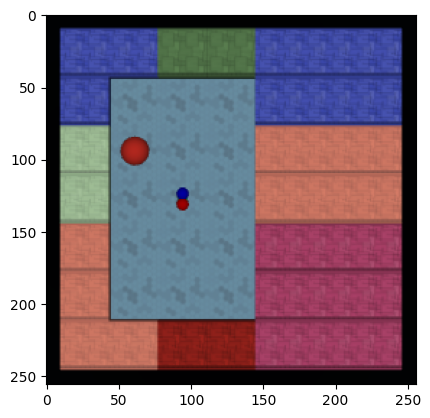

In [45]:
plt.imshow(obs['top_image'])
plt.show()

In [46]:
obs

{'image': array([[[ 72, 108, 145],
         [ 72, 108, 145],
         [ 72, 108, 145],
         ...,
         [ 72, 108, 145],
         [ 72, 108, 145],
         [ 72, 108, 145]],
 
        [[ 72, 108, 145],
         [ 72, 108, 145],
         [ 72, 108, 145],
         ...,
         [ 72, 108, 145],
         [ 72, 108, 145],
         [ 72, 108, 145]],
 
        [[ 72, 108, 145],
         [ 72, 108, 145],
         [ 72, 108, 145],
         ...,
         [ 72, 108, 145],
         [ 72, 108, 145],
         [ 72, 108, 145]],
 
        ...,
 
        [[ 41,  55,  63],
         [ 41,  55,  63],
         [ 41,  55,  63],
         ...,
         [ 41,  55,  63],
         [ 41,  55,  63],
         [ 41,  55,  63]],
 
        [[ 41,  56,  64],
         [ 41,  56,  64],
         [ 41,  55,  63],
         ...,
         [ 41,  56,  64],
         [ 41,  56,  64],
         [ 41,  56,  64]],
 
        [[ 42,  56,  64],
         [ 41,  56,  64],
         [ 41,  56,  64],
         ...,
         [ 41,  56,

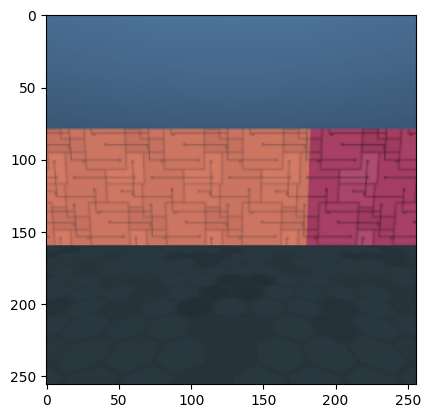

In [47]:
plt.imshow(obs['image'])
plt.show()

In [48]:
step2=env.step(0)

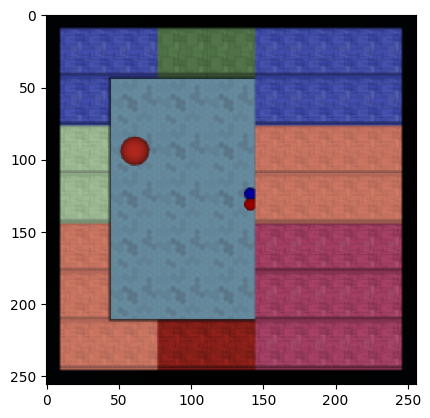

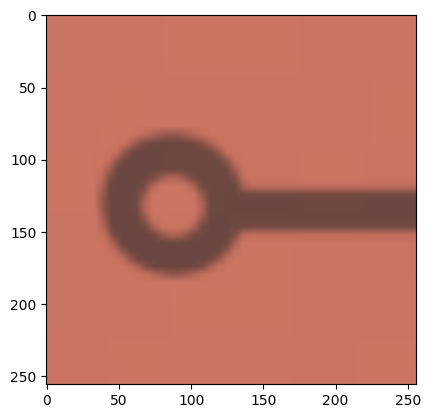

In [49]:
obs = {key: value.copy() for key, value in step2.observation.items()}
plt.imshow(obs['top_image'])
plt.show()
plt.imshow(obs['image'])
plt.show()

In [9]:
obs['agent_dir']

array([0.96984182, 0.24373518])

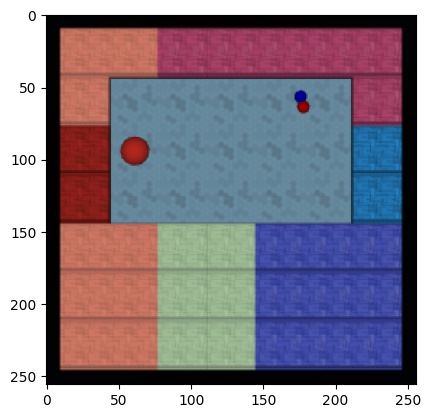

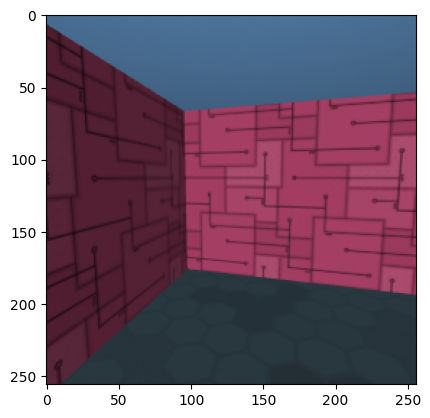

In [41]:
step2=env.step(1)
obs = {key: value.copy() for key, value in step2.observation.items()}
plt.imshow(obs['top_image'])
plt.show()
plt.imshow(obs['image'])
plt.show()

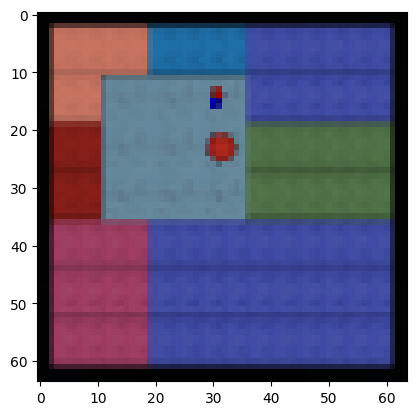

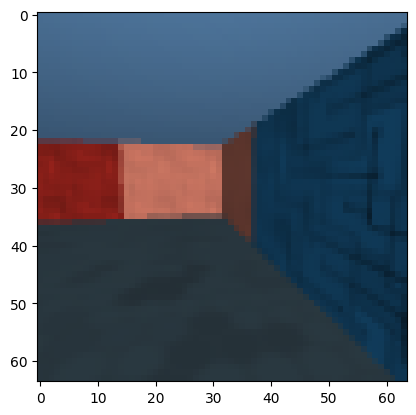

In [10]:
step2=env.step(0)
obs = {key: value.copy() for key, value in step2.observation.items()}
plt.imshow(obs['top_image'])
plt.show()
plt.imshow(obs['image'])
plt.show()

In [10]:
obs

{'image': array([[[ 72, 108, 144],
         [ 72, 109, 145],
         [ 72, 109, 145],
         ...,
         [ 73, 109, 146],
         [ 73, 109, 145],
         [ 72, 109, 144]],
 
        [[ 72, 108, 143],
         [ 72, 108, 144],
         [ 72, 108, 144],
         ...,
         [ 72, 108, 144],
         [ 72, 108, 144],
         [ 72, 108, 143]],
 
        [[ 63,  95, 116],
         [ 72, 107, 142],
         [ 71, 108, 143],
         ...,
         [ 71, 107, 143],
         [ 71, 107, 143],
         [ 71, 107, 142]],
 
        ...,
 
        [[ 44,  62,  39],
         [ 44,  62,  39],
         [ 44,  62,  39],
         ...,
         [ 41,  56,  63],
         [ 41,  55,  63],
         [ 40,  54,  62]],
 
        [[ 44,  62,  39],
         [ 44,  62,  39],
         [ 44,  62,  39],
         ...,
         [ 41,  56,  64],
         [ 41,  56,  64],
         [ 41,  56,  63]],
 
        [[ 44,  62,  39],
         [ 43,  61,  45],
         [ 41,  56,  64],
         ...,
         [ 41,  56,

In [14]:
np.linalg.norm(obs['agent_dir'])

np.float64(0.9999999999999999)

In [ ]:

for step in tqdm(range(max_steps)):
    # Extract observation
    obs = {key: value.copy() for key, value in time_step.observation.items()}
    observations.append(obs)

    # Take a random action
    action = np.random.randint(action_spec.minimum, action_spec.maximum + 1)
    actions.append(action)

    # Step the environment
    time_step = env.step(action)

    # Reset the environment if the episode ends
    if time_step.last():
        time_step = env.reset()

# Convert to NumPy arrays
# Observations need to be handled as a structured array due to multiple keys
obs_keys = observations[0].keys()
obs_array = {key: np.array([obs[key] for obs in observations]) for key in obs_keys}
actions = np.array(actions)

# Save to a .npz file
np.savez("data/small_env_5_5_3actions_100k.npz", **obs_array, actions=actions)

In [3]:
%gui qt6

import napari
import numpy as np

In [4]:
data = np.load("data/small_env_5_5_3actions_100k.npz")

In [5]:
viewer = napari.view_image(data['top_image'])

2025-01-18 21:51:44.361 python3.11[27404:5837137] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-18 21:51:44.361 python3.11[27404:5837137] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [52]:
viewer = napari.view_image(data['image'])